<a href="https://colab.research.google.com/github/jeeyalal/SALES-PREDICTION-USING-PYTHON/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('4.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

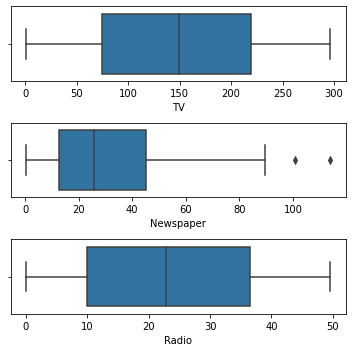

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

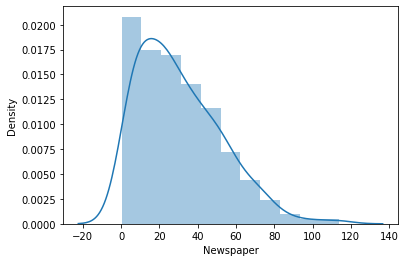

In [ ]:
sns.distplot(df['Newspaper'])

In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)


In [ ]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.25) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
61.275000000000006


<AxesSubplot:xlabel='Newspaper'>

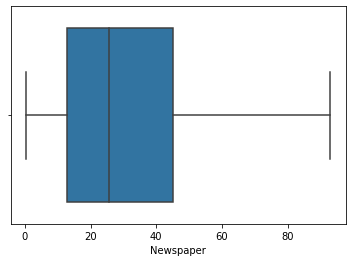

In [ ]:
data = df.copy()
data.loc[data['Newspaper']>=93, 'Newspaper']=93
sns.boxplot(data['Newspaper'])

<AxesSubplot:xlabel='Sales'>

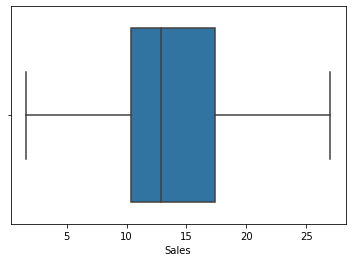

In [ ]:
sns.boxplot(data['Sales'])

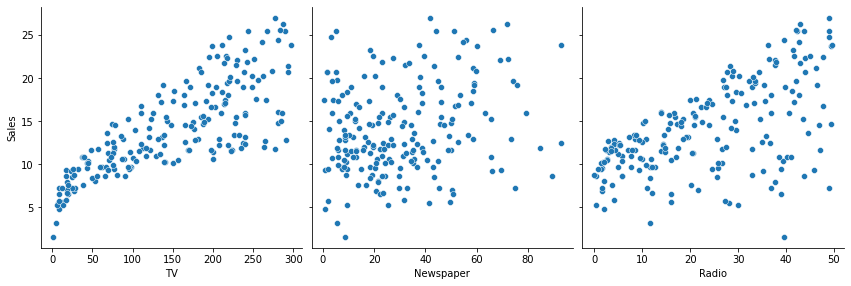

In [ ]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'] ,
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

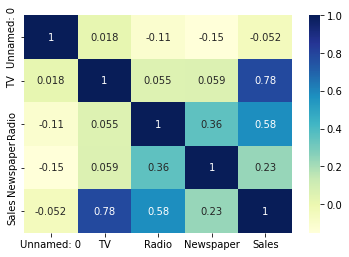

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)
print(important_features)

['TV', 'Radio', 'Sales']


In [ ]:
x = data['TV']
y = data['Sales']
x = x.values.reshape(-1,1)
x
y
print(x.shape,y.shape)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)
print(x_train.shape,y_train.shape)


(200, 1) (200,)
(134, 1) (134,)


In [ ]:
from sklearn.metrics import median_absolute_error , r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
knn = KNeighborsRegressor().fit(x_train , y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)
print(knn_train_pred,knn_test_pred)

[ 5.96 11.12  9.7  20.34 17.58  9.8   5.96 16.64 16.66 17.02 17.3  12.1
 12.1   9.68  6.32 21.62 16.06 16.32  9.66 19.58  9.08 16.88 20.82 21.36
 11.14  7.28 21.06 11.24 11.12 17.32 17.1  16.52 18.48 15.28 13.58 20.82
 11.88  8.2  16.32 15.48 18.2   7.5  19.06 18.2  13.48 20.34 14.36 16.32
 13.54  9.16 11.52  7.28 16.34  9.   13.96  7.7  11.52 20.06 13.26 11.44
 20.94 13.64 14.56 11.24 12.1  21.36 11.7  18.2  18.48 16.58 16.32 13.1
 21.06 11.52  7.28 18.2  13.26  7.5   5.96 11.12 16.64  9.66 21.62  9.8
 16.06 19.84 17.46 17.42 11.52 17.32 15.28 10.52 16.64  5.96 11.88 21.3
 14.66 10.2  17.3  13.58 18.2  17.46 19.06 11.14 13.06 15.68 13.48 14.66
 20.82 17.18 13.48 16.66  5.26 14.36 17.1  17.3  17.3  17.3  11.52  5.96
 11.12 18.2  11.52 13.48 21.06 13.64 16.94 16.52  5.26 21.06 20.04  9.
 13.1   7.5 ] [10.2  20.94 11.52 18.32 21.62 11.52  7.28 17.18 13.96 18.2  18.32 20.06
 10.76 11.14  5.26 17.46  8.2   7.7  13.48 13.92 12.2  21.06  9.16 17.32
  8.2  13.96  9.48 13.48 18.2  11.28 13.26 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import numpy as np
y_test = y_test.astype('float32')
knn_test_pred = le.fit_transform(knn_test_pred.astype('str'))

Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error('y_test','knn_test_pred'))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

In [ ]:
Results.head()
import statsmodels.api as sm
x_train_constant = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train_constant).fit()

In [ ]:
Results.head()
svr = SVR().fit(x_train,y_train)
svr
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)
print(svr_train_pred,svr_test_pred)

[ 7.89856225 11.78219606  8.67299008 19.24085155 16.69961627  8.992763
  7.91447196 15.81288413 16.85025543 15.50649446 19.29048346 10.91727905
 10.89832865  8.92851368  7.9762565  19.06236709 17.85187768 14.51112503
  9.23698062 17.54226081  9.60599259 18.34311325 19.02884588 18.75483594
 11.43975532  8.19262424 19.37160761 12.04506615 11.72380448 16.49386314
 18.10309602 16.96412568 16.48174455 17.12468375 14.93502083 19.12388925
 10.81701527  8.46903409 14.45002802 18.45377965 18.65993811  8.12277963
 17.34732861 18.61457071 13.4500978  19.19851001 15.18517357 14.56771745
 12.51693008  9.32555818 10.95496861  8.17297272 16.01028878  9.79285168
 13.88572004  8.40031602 10.61097393 18.68419411 12.76618791 12.11412792
 19.26949201 12.85882686 14.71425592 11.96027899 10.90781261 18.81120386
 12.29961668 18.58085946 16.40296642 17.93722091 14.46016416 13.17557184
 19.37059411 10.60098901  8.19927321 17.73764948 12.66392639  8.11373382
  7.89025759 11.80148293 15.84863146  9.24216586 19.0

In [ ]:
from sklearn.metrics import mean_squared_error
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5743957008110532
RMSE: 3.2237683662157486


In [ ]:
Results.head()
import statsmodels.api as sm
x_train_constant = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train_constant).fit()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     218.0
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           9.71e-30
Time:                        09:57:29   Log-Likelihood:                -348.38
No. Observations:                 134   AIC:                             700.8
Df Residuals:                     132   BIC:                             706.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9741      0.572     12.185      0.0

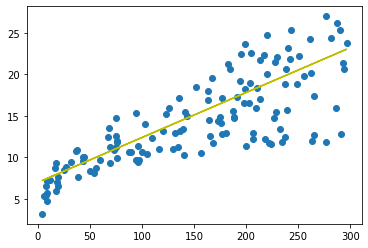

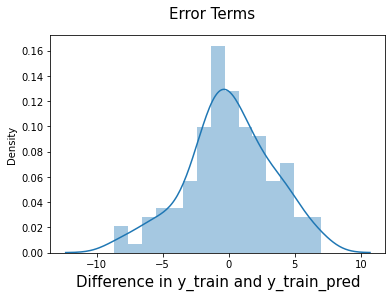

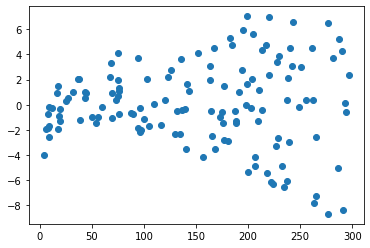

array([11.71519852, 20.84138858, 10.41772842, 17.44650441, 19.09029172,
       10.70063543,  7.88619841, 17.25627383, 14.27599477, 17.62697958,
       17.48064836, 18.68544203, 10.01287873, 11.28108258,  7.00821113,
       18.16840507,  8.31543664,  8.19349396, 13.77846864, 13.70042533,
       12.37368898, 20.64140259,  9.14464686, 16.71972605,  8.22276021,
       14.28087248,  9.77874878, 13.76383552, 17.69526748, 10.1982316 ,
       12.87609282,  8.13496148, 20.80724463, 20.32435163,  7.61792452,
        8.9007615 , 10.23725326, 17.59283563, 20.66579113, 12.32978962,
        9.32999973, 19.35368791, 10.78843416, 12.85170428, 15.27592473,
        7.61304681, 16.61241649, 12.48099854, 18.68544203, 15.99294768,
       19.99266754,  7.84717676, 13.36874124, 17.82208786, 18.67080891,
       12.69073995, 17.98792991, 12.21272465, 16.39779738, 14.1589298 ,
       15.32957951,  8.36909142, 11.1542622 , 10.88598831, 17.52942543,
       11.38351443])

In [ ]:
model.params
print(model.summary())
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.9955 + 0.0541 * x_train, 'y')
plt.show()
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res
y_train_pred
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize= 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()
plt.scatter(x_train, res)
plt.show()
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)
y_pred

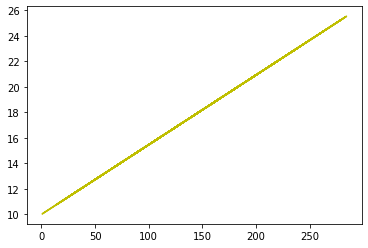

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(x_test,y_test)
plt.plot(x_test, 9.9955 + 0.0547 * x_test, 'y')
plt.show()